# Максим Ляра GPN Intelligence Cup 2023

## Импорт библиотек и данных

In [80]:
! pip install Catboost

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from catboost import CatBoostRegressor

df - Основной dataframe с данными о транзакциях, к которому присоединю остальные \
df2 - Данные о ценах конкурентов \
df3 - Данные о погоде \
df4 - Данные о себестоимости

In [2]:
df = pd.read_parquet("transaction_df.parquet")
df2 = pd.read_parquet("df_competitors.parquet")
df3 = pd.read_parquet("weather_df.parquet")
df4 = pd.read_parquet("df_cost.parquet")

In [3]:
display(df)
print(len(df))
display(df2)
print(len(df2))
display(df3)
print(len(df3))
display(df4)
print(len(df4))

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


875036


,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
...,...,...,...,...,...
39451,Фалькония,Эстус,Светлые Души,14.99,2218-09-17
39453,Фалькония,Эстус,Светлые Души,15.36,2218-09-20
39454,Фалькония,Эстус,Светлые Души,15.36,2218-09-22
39455,Фалькония,Эстус,Светлые Души,15.36,2218-09-23


31799


,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27
4996,Анор Лондо,0,0,1,2218-09-27
4997,Врата Балдура,1,0,0,2218-09-27
4998,Нокрон,0,0,0,2218-09-27


5000


,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


1117


## EDA и предобработка

Количество записей в день

<Axes: >

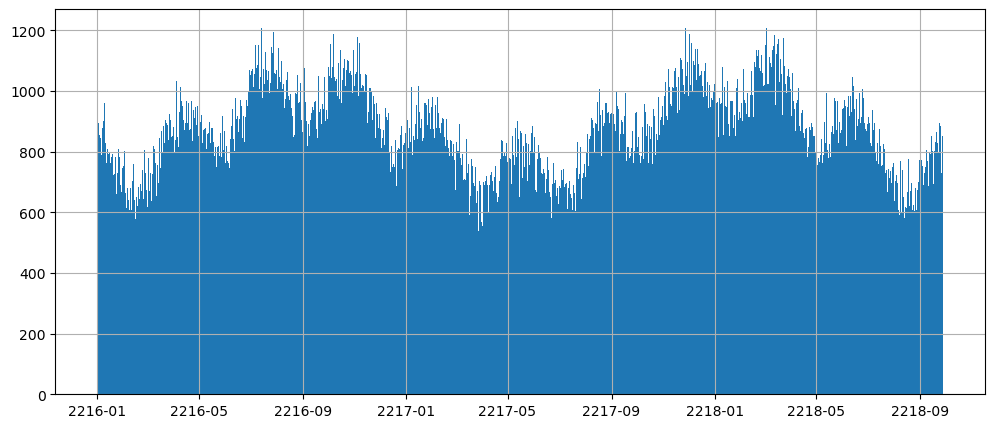

In [4]:
df['datetime'].hist(bins = 1000, figsize=(12,5))

Количество дней в датасете с данными о транзакциях:

In [5]:
df['datetime'].max() - df['datetime'].min()

Timedelta('999 days 23:49:00')

In [6]:
print('Максимальная дата в датасете:', df['datetime'].max())
print('Минимальная дата в датасете:', df['datetime'].min())

Максимальная дата в датасете: 2218-09-27 23:57:00
Минимальная дата в датасете: 2216-01-02 00:08:00


In [7]:
print('Количество строк в df:', len(df))
print('______________')
print('Количество строк с пустыми элементами:')
print(df.isna().sum())

Количество строк в df: 875036
______________
Количество строк с пустыми элементами:
product       0
price         0
amount        0
place       432
datetime      0
dtype: int64


In [8]:
print('Количество строк в df2:', len(df2))
print('______________')
print('Количество строк с пустыми элементами:')
print(df2.isna().sum())

Количество строк в df2: 31799
______________
Количество строк с пустыми элементами:
place         0
product       0
competitor    0
price         0
date          0
dtype: int64


In [9]:
print('Количество строк в df3:', len(df3))
print('______________')
print('Количество строк с пустыми элементами:')
print(df3.isna().sum())

Количество строк в df3: 5000
______________
Количество строк с пустыми элементами:
place    0
hot      0
rain     0
snow     0
date     0
dtype: int64


In [10]:
print('Количество строк в df4:', len(df4))
print('______________')
print('Количество строк с пустыми элементами:')
print(df4.isna().sum())

Количество строк в df4: 1117
______________
Количество строк с пустыми элементами:
place      0
product    0
cost       0
date       0
dtype: int64


In [11]:
df = df.sort_values(by=['product', 'place', 'datetime']).reset_index(drop=True).copy()
df.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.9,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.9,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.9,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.9,0.550320,Анор Лондо,2216-01-02 02:30:00


Количество пропусков в данных в разбивке по 10 дней:

<Axes: >

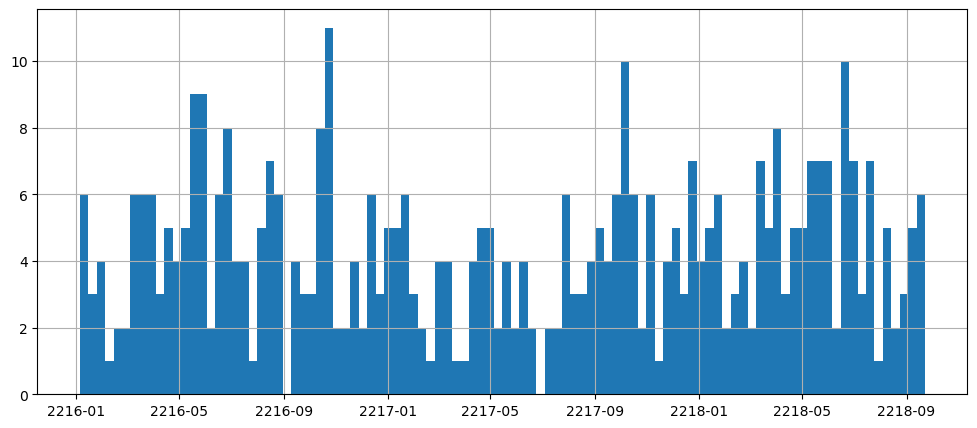

In [12]:
df[df['place'].isna()==True]['datetime'].hist(bins = 100, figsize=(12,5))

Очистка от пропусков:

In [13]:
df = df.dropna().copy()

Распределение цен до обработки данных:

<Axes: >

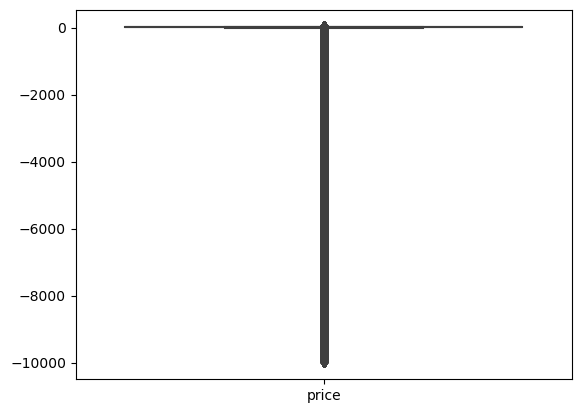

In [14]:
sns.boxplot(df[['price']])

Распределение спроса до обработки данных:

<Axes: >

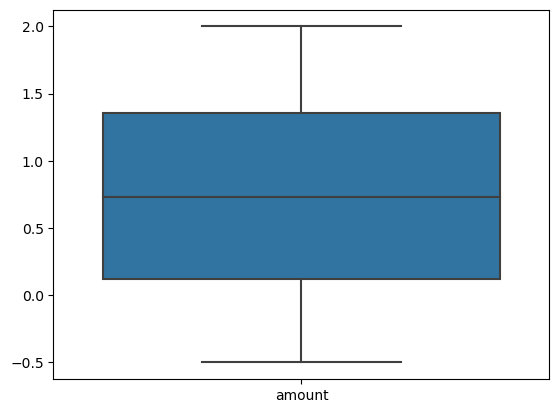

In [15]:
sns.boxplot(df[['amount']])

In [16]:
print('Количество строк до обработки датафрейма:', len(df))

Количество строк до обработки датафрейма: 874604


Визуализация количества физически невозможных значений цены в разбивке по 10 дней:

<Axes: >

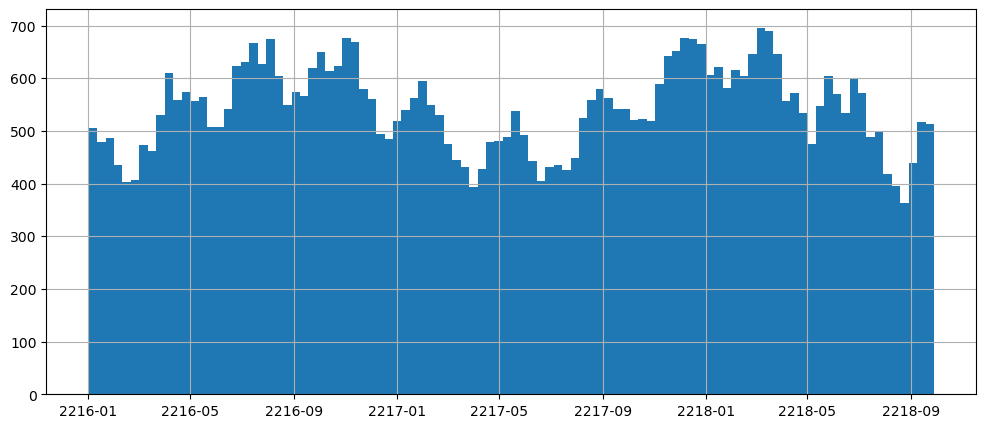

In [17]:
df[df['price']<=0]['datetime'].hist(bins = 100, figsize=(12,5))

Визуализация количества физически невозможных значений спроса в разбивке по 10 дней:

<Axes: >

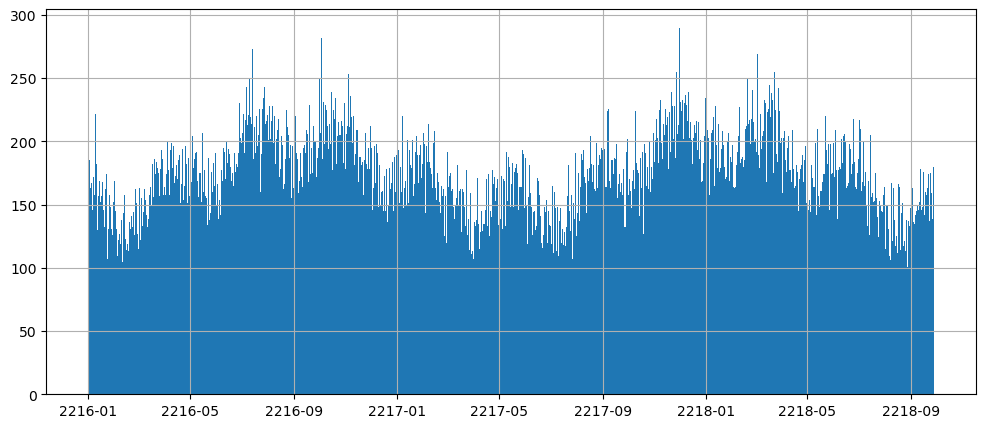

In [18]:
df[df['amount']<=0]['datetime'].hist(bins = 1000, figsize=(12,5))

In [19]:
start_price_df = df[df['price'] < 0]
start_price_df.head()

,product,price,amount,place,datetime
24,Целебные травы,-7154.53,1.988265,Анор Лондо,2216-01-02 13:57:00
31,Целебные травы,-8870.90,1.703059,Анор Лондо,2216-01-02 16:02:00
53,Целебные травы,-7675.59,0.905378,Анор Лондо,2216-01-03 05:34:00
55,Целебные травы,-1481.18,0.254449,Анор Лондо,2216-01-03 05:48:00
73,Целебные травы,-8313.96,0.775686,Анор Лондо,2216-01-03 13:04:00


In [20]:
start_amount_df = df[df['amount'] < 0]
start_amount_df.head()

,product,price,amount,place,datetime
10,Целебные травы,3.9,-0.181400,Анор Лондо,2216-01-02 03:52:00
12,Целебные травы,3.9,-0.302981,Анор Лондо,2216-01-02 04:20:00
18,Целебные травы,3.9,-0.026968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.9,-0.424848,Анор Лондо,2216-01-02 10:01:00
26,Целебные травы,3.9,-0.209384,Анор Лондо,2216-01-02 14:22:00


In [21]:
df[df.index.isin(range(0, 30))]

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
5,Целебные травы,3.90,0.891872,Анор Лондо,2216-01-02 02:35:00
6,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
7,Целебные травы,3.90,0.910043,Анор Лондо,2216-01-02 03:06:00
8,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
9,Целебные травы,3.90,1.644907,Анор Лондо,2216-01-02 03:49:00


In [22]:
# lower_bound = 0
# upper_bound=1000000
# columns = ['price', 'amount']

# for col in columns:
    
#     mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
#     neg_indices = df.loc[mask, col].index

    
#     df.loc[neg_indices, col] = df[col].rolling(window=5, min_periods=3, center=True).mean().reset_index(drop=True)



In [23]:
less_and_less = df[(df['amount'] <= 0) & (df['price'] <= 0)]['datetime'].count()
less_and_less

10812

In [24]:
was_less_and_less_index = df[(df['amount'] <= 0) & (df['price'] <= 0)].index

In [25]:
was_less_and_less_index

Int64Index([   198,    305,    512,    517,    532,    577,    832,    940,
              1008,   1100,
            ...
            874107, 874115, 874232, 874439, 874443, 874452, 874504, 874696,
            874794, 874834],
           dtype='int64', length=10812)

In [26]:
less_or_less = df[(df['amount'] <= 0) | (df['price'] <= 0)]['datetime'].count()
less_or_less

218945

In [27]:
percent_of_ffill = round(less_and_less/less_or_less*100, 2)

In [28]:
print(f'Заполню {percent_of_ffill}% от всех значений, где price или/и amount меньше 0 предыдущими значениями, остальные {100-percent_of_ffill}% заполню с помощью ML')

Заполню 4.94% от всех значений, где price или/и amount меньше 0 предыдущими значениями, остальные 95.06% заполню с помощью ML


In [29]:
mask = (df['amount'] <= 0) & (df['price'] <= 0)

df.loc[mask, ['amount', 'price']] = np.nan


# Заполните значения предыдущими значениями
df.ffill(inplace=True)


Заполнено значений:

In [30]:
diff_less_and_less = less_and_less - df[(df['amount'] <= 0) & (df['price'] <= 0)]['datetime'].count()
diff_less_and_less

10812

Осталось незаполненных значений типа less_and_less_than_0:

In [31]:
df[(df['amount'] <= 0) & (df['price'] <= 0)]['datetime'].count()

0

Как заполнились пропуски?

In [32]:
for i in was_less_and_less_index[:7]:
    display(df[df.index.isin(range(i-3, i+4))])


,product,price,amount,place,datetime
195,Целебные травы,3.9,1.391700,Анор Лондо,2216-01-06 00:06:00
196,Целебные травы,3.9,0.838019,Анор Лондо,2216-01-06 00:35:00
197,Целебные травы,3.9,1.022115,Анор Лондо,2216-01-06 01:16:00
198,Целебные травы,3.9,1.022115,Анор Лондо,2216-01-06 01:16:00
199,Целебные травы,3.9,-0.224189,Анор Лондо,2216-01-06 01:40:00
200,Целебные травы,3.9,1.997998,Анор Лондо,2216-01-06 01:50:00
201,Целебные травы,3.9,-0.410945,Анор Лондо,2216-01-06 02:17:00


,product,price,amount,place,datetime
302,Целебные травы,3.90,0.709166,Анор Лондо,2216-01-07 13:21:00
303,Целебные травы,3.90,0.914332,Анор Лондо,2216-01-07 13:34:00
304,Целебные травы,3.90,0.464744,Анор Лондо,2216-01-07 14:21:00
305,Целебные травы,3.90,0.464744,Анор Лондо,2216-01-07 14:49:00
306,Целебные травы,-5840.97,1.819570,Анор Лондо,2216-01-07 15:52:00
307,Целебные травы,3.90,0.871173,Анор Лондо,2216-01-07 15:56:00
308,Целебные травы,3.90,1.376852,Анор Лондо,2216-01-07 16:06:00


,product,price,amount,place,datetime
509,Целебные травы,3.9,0.703246,Анор Лондо,2216-01-10 19:59:00
510,Целебные травы,3.9,0.218833,Анор Лондо,2216-01-10 20:26:00
511,Целебные травы,3.9,1.023363,Анор Лондо,2216-01-10 20:26:00
512,Целебные травы,3.9,1.023363,Анор Лондо,2216-01-10 21:18:00
513,Целебные травы,3.9,1.019289,Анор Лондо,2216-01-10 21:40:00
514,Целебные травы,3.9,0.568064,Анор Лондо,2216-01-10 21:57:00
515,Целебные травы,3.9,0.249513,Анор Лондо,2216-01-10 22:01:00


,product,price,amount,place,datetime
514,Целебные травы,3.9,0.568064,Анор Лондо,2216-01-10 21:57:00
515,Целебные травы,3.9,0.249513,Анор Лондо,2216-01-10 22:01:00
516,Целебные травы,3.9,1.385024,Анор Лондо,2216-01-10 22:08:00
517,Целебные травы,3.9,1.385024,Анор Лондо,2216-01-10 22:15:00
518,Целебные травы,3.9,1.155193,Анор Лондо,2216-01-10 22:17:00
519,Целебные травы,3.9,1.770382,Анор Лондо,2216-01-10 22:17:00
520,Целебные травы,3.9,-0.410538,Анор Лондо,2216-01-10 22:36:00


,product,price,amount,place,datetime
529,Целебные травы,3.9,1.276146,Анор Лондо,2216-01-11 02:16:00
530,Целебные травы,3.9,0.577145,Анор Лондо,2216-01-11 02:41:00
531,Целебные травы,3.9,0.788346,Анор Лондо,2216-01-11 02:58:00
532,Целебные травы,3.9,0.788346,Анор Лондо,2216-01-11 04:03:00
533,Целебные травы,3.9,-0.241742,Анор Лондо,2216-01-11 04:42:00
534,Целебные травы,3.9,1.081173,Анор Лондо,2216-01-11 05:38:00
535,Целебные травы,3.9,0.902172,Анор Лондо,2216-01-11 05:43:00


,product,price,amount,place,datetime
574,Целебные травы,3.9,1.934983,Анор Лондо,2216-01-12 00:26:00
575,Целебные травы,3.9,0.997494,Анор Лондо,2216-01-12 02:34:00
576,Целебные травы,3.9,1.936522,Анор Лондо,2216-01-12 02:40:00
577,Целебные травы,3.9,1.936522,Анор Лондо,2216-01-12 03:11:00
578,Целебные травы,3.9,1.006241,Анор Лондо,2216-01-12 03:56:00
579,Целебные травы,3.9,-0.368974,Анор Лондо,2216-01-12 04:01:00
580,Целебные травы,3.9,0.728323,Анор Лондо,2216-01-12 04:11:00


,product,price,amount,place,datetime
829,Целебные травы,3.9,1.438967,Анор Лондо,2216-01-17 02:43:00
830,Целебные травы,3.9,-0.033693,Анор Лондо,2216-01-17 02:49:00
831,Целебные травы,3.9,1.881260,Анор Лондо,2216-01-17 03:37:00
832,Целебные травы,3.9,1.881260,Анор Лондо,2216-01-17 04:26:00
833,Целебные травы,3.9,1.846989,Анор Лондо,2216-01-17 05:15:00
834,Целебные травы,3.9,1.337106,Анор Лондо,2216-01-17 06:41:00
835,Целебные травы,3.9,1.222187,Анор Лондо,2216-01-17 07:51:00


Дубликатов строк:

In [33]:
df.duplicated().sum()

221

Удаление дубликатов строк

In [34]:
df = df.drop_duplicates().copy()

In [35]:
df.duplicated().sum()

0

## МЛ для заполнения пропусков (Catboost+TimeSeriesSplit)
Пока что не буду объединять с другими таблицами. Считаю, что для заполнения ячеек, где значение спроса или значение цены меньше нуля, достаточно данных о цене/спросе соответственно, названии продукта, городе продажи

In [36]:
fulfill_df = df[(df['amount'] > 0) & (df['price'] > 0)]

In [37]:
# Определите размер обучающего набора (80% данных) и размер тестового набора (20% данных)
train_size = int(0.8 * len(fulfill_df))
test_size = len(fulfill_df) - train_size

# Выберите индексы для обучающего и тестового наборов
train_indices = fulfill_df.index[:train_size]
test_indices = fulfill_df.index[train_size:]

# Разделите данные на обучающий и тестовый наборы
train_data = fulfill_df.loc[train_indices]
test_data = fulfill_df.loc[test_indices]

In [38]:
train_data

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00


In [39]:
def datetime_features(df_temp):

    df_temp['month'] = df_temp['datetime'].dt.month
    df_temp['day'] = df_temp['datetime'].dt.day
    df_temp['year'] = df_temp['datetime'].dt.year
    df_temp['dayofweek'] = df_temp['datetime'].dt.dayofweek
    df_temp['quarter'] = df_temp['datetime'].dt.quarter
    df_temp['dayofmonth'] = df_temp['datetime'].dt.day
    df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear
    return df_temp.copy()
train=datetime_features(train_data)
test=datetime_features(test_data)

/var/folders/0k/w2d250bd1439pcb67w1jhq840000gn/T/ipykernel_91170/447171604.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear
/var/folders/0k/w2d250bd1439pcb67w1jhq840000gn/T/ipykernel_91170/447171604.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear


In [40]:
train_data

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


In [41]:
cat_feat = ['product', 'place', 'month', 'day', 'year', 'dayofweek', 'quarter',	'dayofmonth', 'weekofyear']

X_train = train_data.drop('price', axis=1)
y_train = train_data["price"]

X_val = test_data.drop('price', axis=1)
y_val = test_data["price"]

In [43]:
df = datetime_features(train_data)

/var/folders/0k/w2d250bd1439pcb67w1jhq840000gn/T/ipykernel_91170/447171604.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear


In [44]:
df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


In [42]:
model_for_price = CatBoostRegressor(cat_features=cat_feat,
    iterations=250, 
    learning_rate=0.2,
    depth = 3,
    early_stopping_rounds=250,
    loss_function='MAE'
)
# Fit model
model_for_price.fit(X_train, y_train,  
        eval_set=(X_val, y_val), 
        verbose=True
)
# # Get predictions
# preds = model_for_price.predict(eval_data)

0:	learn: 3.5180841	test: 4.4575668	best: 4.4575668 (0)	total: 200ms	remaining: 49.7s
1:	learn: 3.0501216	test: 4.1678445	best: 4.1678445 (1)	total: 308ms	remaining: 38.2s
2:	learn: 2.5885748	test: 3.7519772	best: 3.7519772 (2)	total: 389ms	remaining: 32s
3:	learn: 2.2766568	test: 3.8380758	best: 3.7519772 (2)	total: 493ms	remaining: 30.3s
4:	learn: 2.0277057	test: 3.6253841	best: 3.6253841 (4)	total: 569ms	remaining: 27.9s
5:	learn: 1.8112614	test: 3.4212582	best: 3.4212582 (5)	total: 648ms	remaining: 26.3s
6:	learn: 1.6631460	test: 3.2881400	best: 3.2881400 (6)	total: 734ms	remaining: 25.5s
7:	learn: 1.5112556	test: 3.1642695	best: 3.1642695 (7)	total: 823ms	remaining: 24.9s
8:	learn: 1.3820130	test: 3.3806569	best: 3.1642695 (7)	total: 912ms	remaining: 24.4s
9:	learn: 1.3063095	test: 3.2672093	best: 3.1642695 (7)	total: 1.01s	remaining: 24.3s
10:	learn: 1.2075232	test: 3.1821982	best: 3.1642695 (7)	total: 1.08s	remaining: 23.5s
11:	learn: 1.1501292	test: 3.1207096	best: 3.1207096 (1

## Результат

In [ ]:
end_price_df = df[df['price'] < 0]
end_price_df

,product,price,amount,place,datetime
24,Целебные травы,-1427.786,1.988265,Анор Лондо,2216-01-02 13:57:00
31,Целебные травы,-1771.060,1.703059,Анор Лондо,2216-01-02 16:02:00
53,Целебные травы,-1829.014,0.905378,Анор Лондо,2216-01-03 05:34:00
55,Целебные травы,-1829.014,0.254449,Анор Лондо,2216-01-03 05:48:00
73,Целебные травы,-1659.672,0.775686,Анор Лондо,2216-01-03 13:04:00
...,...,...,...,...,...
874388,Эстус,-1381.442,0.581463,Фалькония,2218-09-20 15:10:00
874502,Эстус,-1513.946,0.064459,Фалькония,2218-09-22 06:53:00
874504,Эстус,-1513.946,0.555100,Фалькония,2218-09-22 07:32:00
874539,Эстус,-3059.688,1.164296,Фалькония,2218-09-22 22:17:00


In [ ]:
end_amount_df = df[df['amount'] < 0]
end_amount_df

,product,price,amount,place,datetime
422,Целебные травы,3.90,-0.165123,Анор Лондо,2216-01-09 14:24:00
455,Целебные травы,3.90,-0.090032,Анор Лондо,2216-01-10 03:12:00
456,Целебные травы,3.90,-0.109079,Анор Лондо,2216-01-10 03:15:00
658,Целебные травы,3.90,-0.106470,Анор Лондо,2216-01-14 02:51:00
659,Целебные травы,3.90,-0.154130,Анор Лондо,2216-01-14 03:28:00
...,...,...,...,...,...
870928,Эстус,9.69,-0.028707,Фалькония,2218-07-24 16:17:00
871323,Эстус,9.69,-0.044234,Фалькония,2218-07-30 18:42:00
872602,Эстус,9.56,-0.178665,Фалькония,2218-08-22 10:26:00
873463,Эстус,9.29,-0.033790,Фалькония,2218-09-06 09:15:00


In [ ]:
difference_price_df = start_price_df[~start_price_df.isin(end_price_df)].dropna()
difference_price_df.head()

,product,price,amount,place,datetime
7995,Целебные травы,-24.57,0.432921,Анор Лондо,2216-06-07 03:18:00
8365,Целебные травы,-4.76,1.227475,Анор Лондо,2216-06-13 12:59:00
21302,Целебные травы,-22.74,1.382071,Анор Лондо,2217-01-14 05:51:00
37178,Целебные травы,-7.44,0.310599,Анор Лондо,2217-11-29 08:51:00
45031,Целебные травы,-22.78,-0.402673,Анор Лондо,2218-03-29 04:09:00


In [ ]:
df[df.index.isin(range(0, 30))]

,product,price,amount,place,datetime
0,Целебные травы,3.900,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.900,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.900,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.900,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.900,0.550320,Анор Лондо,2216-01-02 02:30:00
5,Целебные травы,3.900,0.891872,Анор Лондо,2216-01-02 02:35:00
6,Целебные травы,3.900,0.882450,Анор Лондо,2216-01-02 03:03:00
7,Целебные травы,3.900,0.910043,Анор Лондо,2216-01-02 03:06:00
8,Целебные травы,3.900,0.621377,Анор Лондо,2216-01-02 03:12:00
9,Целебные травы,3.900,1.644907,Анор Лондо,2216-01-02 03:49:00


In [ ]:
difference_amount_df = start_amount_df[~start_amount_df.isin(end_amount_df)].dropna()
difference_amount_df.head()

,product,price,amount,place,datetime
10,Целебные травы,3.9,-0.181400,Анор Лондо,2216-01-02 03:52:00
12,Целебные травы,3.9,-0.302981,Анор Лондо,2216-01-02 04:20:00
18,Целебные травы,3.9,-0.026968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.9,-0.424848,Анор Лондо,2216-01-02 10:01:00
26,Целебные травы,3.9,-0.209384,Анор Лондо,2216-01-02 14:22:00


In [ ]:
print(len(difference_price_df) + len(difference_amount_df))
print(len(end_price_df) + len(end_amount_df))

198670
31087


In [ ]:
# df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
# df = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]


In [ ]:
for i in difference_price_df.index[:5]:
    display(df[df.index.isin(range(i-3, i+4))])


,product,price,amount,place,datetime
7992,Целебные травы,6.340,1.373402,Анор Лондо,2216-06-07 00:58:00
7993,Целебные травы,6.340,0.832084,Анор Лондо,2216-06-07 01:52:00
7994,Целебные травы,6.340,0.394044,Анор Лондо,2216-06-07 02:50:00
7995,Целебные травы,0.158,0.432921,Анор Лондо,2216-06-07 03:18:00
7996,Целебные травы,6.340,1.684635,Анор Лондо,2216-06-07 04:34:00
7997,Целебные травы,6.340,0.339318,Анор Лондо,2216-06-07 04:48:00
7998,Целебные травы,6.340,0.868322,Анор Лондо,2216-06-07 05:35:00


,product,price,amount,place,datetime
8362,Целебные травы,6.34,0.911195,Анор Лондо,2216-06-13 12:16:00
8363,Целебные травы,6.34,0.418277,Анор Лондо,2216-06-13 12:17:00
8364,Целебные травы,6.34,0.695039,Анор Лондо,2216-06-13 12:29:00
8365,Целебные травы,4.12,1.227475,Анор Лондо,2216-06-13 12:59:00
8366,Целебные травы,6.34,1.901526,Анор Лондо,2216-06-13 13:21:00
8367,Целебные травы,6.34,0.657901,Анор Лондо,2216-06-13 13:57:00
8368,Целебные травы,6.34,0.154358,Анор Лондо,2216-06-13 14:21:00


,product,price,amount,place,datetime
21299,Целебные травы,8.61,1.576543,Анор Лондо,2217-01-14 04:25:00
21300,Целебные травы,8.61,1.454128,Анор Лондо,2217-01-14 05:03:00
21301,Целебные травы,8.61,1.774932,Анор Лондо,2217-01-14 05:23:00
21302,Целебные травы,2.34,1.382071,Анор Лондо,2217-01-14 05:51:00
21303,Целебные травы,8.61,0.955392,Анор Лондо,2217-01-14 06:54:00
21304,Целебные травы,8.61,0.240806,Анор Лондо,2217-01-14 07:24:00
21305,Целебные травы,8.61,1.424573,Анор Лондо,2217-01-14 07:42:00


,product,price,amount,place,datetime
37175,Целебные травы,9.66,1.833394,Анор Лондо,2217-11-29 06:13:00
37176,Целебные травы,9.66,1.572491,Анор Лондо,2217-11-29 06:42:00
37177,Целебные травы,9.66,1.110014,Анор Лондо,2217-11-29 07:12:00
37178,Целебные травы,6.24,0.310599,Анор Лондо,2217-11-29 08:51:00
37179,Целебные травы,9.66,1.464498,Анор Лондо,2217-11-29 08:53:00
37180,Целебные травы,9.66,1.809087,Анор Лондо,2217-11-29 08:54:00
37181,Целебные травы,9.66,1.451629,Анор Лондо,2217-11-29 09:16:00


,product,price,amount,place,datetime
45028,Целебные травы,10.37,1.998496,Анор Лондо,2218-03-29 03:20:00
45029,Целебные травы,10.37,1.465186,Анор Лондо,2218-03-29 03:46:00
45030,Целебные травы,10.37,0.293248,Анор Лондо,2218-03-29 04:03:00
45031,Целебные травы,3.74,0.415264,Анор Лондо,2218-03-29 04:09:00
45032,Целебные травы,10.37,0.447632,Анор Лондо,2218-03-29 04:14:00
45033,Целебные травы,10.37,1.071414,Анор Лондо,2218-03-29 04:38:00
45034,Целебные травы,10.37,1.627027,Анор Лондо,2218-03-29 04:48:00


In [ ]:
for i in difference_amount_df.index[:7]:
    display(df[df.index.isin(range(i-3, i+4))])


,product,price,amount,place,datetime
7,Целебные травы,3.9,0.910043,Анор Лондо,2216-01-02 03:06:00
8,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00
9,Целебные травы,3.9,1.644907,Анор Лондо,2216-01-02 03:49:00
10,Целебные травы,3.9,0.378411,Анор Лондо,2216-01-02 03:52:00
11,Целебные травы,3.9,0.110150,Анор Лондо,2216-01-02 03:59:00
12,Целебные травы,3.9,0.440216,Анор Лондо,2216-01-02 04:20:00
13,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00


,product,price,amount,place,datetime
9,Целебные травы,3.9,1.644907,Анор Лондо,2216-01-02 03:49:00
10,Целебные травы,3.9,0.378411,Анор Лондо,2216-01-02 03:52:00
11,Целебные травы,3.9,0.110150,Анор Лондо,2216-01-02 03:59:00
12,Целебные травы,3.9,0.440216,Анор Лондо,2216-01-02 04:20:00
13,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00
14,Целебные травы,3.9,1.208150,Анор Лондо,2216-01-02 06:53:00
15,Целебные травы,3.9,1.115369,Анор Лондо,2216-01-02 07:29:00


,product,price,amount,place,datetime
15,Целебные травы,3.9,1.115369,Анор Лондо,2216-01-02 07:29:00
16,Целебные травы,3.9,0.734510,Анор Лондо,2216-01-02 08:39:00
17,Целебные травы,3.9,1.667498,Анор Лондо,2216-01-02 09:09:00
18,Целебные травы,3.9,0.526968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.9,0.727390,Анор Лондо,2216-01-02 10:01:00
20,Целебные травы,3.9,0.684649,Анор Лондо,2216-01-02 11:08:00
21,Целебные травы,3.9,1.736619,Анор Лондо,2216-01-02 11:54:00


,product,price,amount,place,datetime
16,Целебные травы,3.9,0.734510,Анор Лондо,2216-01-02 08:39:00
17,Целебные травы,3.9,1.667498,Анор Лондо,2216-01-02 09:09:00
18,Целебные травы,3.9,0.526968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.9,0.727390,Анор Лондо,2216-01-02 10:01:00
20,Целебные травы,3.9,0.684649,Анор Лондо,2216-01-02 11:08:00
21,Целебные травы,3.9,1.736619,Анор Лондо,2216-01-02 11:54:00
22,Целебные травы,3.9,1.826042,Анор Лондо,2216-01-02 12:05:00


,product,price,amount,place,datetime
23,Целебные травы,3.900,0.940661,Анор Лондо,2216-01-02 12:27:00
24,Целебные травы,-1427.786,1.988265,Анор Лондо,2216-01-02 13:57:00
25,Целебные травы,3.900,0.109815,Анор Лондо,2216-01-02 14:17:00
26,Целебные травы,3.900,0.719872,Анор Лондо,2216-01-02 14:22:00
27,Целебные травы,3.900,1.550044,Анор Лондо,2216-01-02 14:28:00
28,Целебные травы,3.900,0.160619,Анор Лондо,2216-01-02 14:33:00
29,Целебные травы,3.900,1.913532,Анор Лондо,2216-01-02 14:50:00


,product,price,amount,place,datetime
29,Целебные травы,3.90,1.913532,Анор Лондо,2216-01-02 14:50:00
30,Целебные травы,3.90,0.107109,Анор Лондо,2216-01-02 15:11:00
31,Целебные травы,-1771.06,1.703059,Анор Лондо,2216-01-02 16:02:00
32,Целебные травы,3.90,0.776668,Анор Лондо,2216-01-02 16:21:00
33,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
34,Целебные травы,3.90,0.910734,Анор Лондо,2216-01-02 16:45:00
35,Целебные травы,3.90,1.728449,Анор Лондо,2216-01-02 16:49:00


,product,price,amount,place,datetime
41,Целебные травы,3.9,0.887964,Анор Лондо,2216-01-02 21:12:00
42,Целебные травы,3.9,0.959618,Анор Лондо,2216-01-02 21:29:00
43,Целебные травы,3.9,0.147680,Анор Лондо,2216-01-02 22:25:00
44,Целебные травы,3.9,0.575741,Анор Лондо,2216-01-02 23:21:00
45,Целебные травы,3.9,1.837475,Анор Лондо,2216-01-03 01:59:00
46,Целебные травы,3.9,0.313576,Анор Лондо,2216-01-03 02:35:00
47,Целебные травы,3.9,0.218331,Анор Лондо,2216-01-03 02:36:00


In [ ]:
i=4712
df[df.index.isin(range(i-3, i+4))]


,product,price,amount,place,datetime
4709,Целебные травы,5.57,0.438151,Анор Лондо,2216-04-05 19:46:00
4710,Целебные травы,5.57,1.825163,Анор Лондо,2216-04-05 19:47:00
4711,Целебные травы,5.57,1.764736,Анор Лондо,2216-04-05 19:48:00
4712,Целебные травы,5.57,1.090663,Анор Лондо,2216-04-05 20:25:00
4713,Целебные травы,5.57,1.625506,Анор Лондо,2216-04-05 20:54:00
4714,Целебные травы,5.57,1.584885,Анор Лондо,2216-04-05 21:19:00
4715,Целебные травы,5.57,1.174182,Анор Лондо,2216-04-05 21:49:00


In [ ]:
len(df)

874604

In [ ]:
df

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
...,...,...,...,...,...
874895,Эстус,9.28,0.933200,Фалькония,2218-09-27 23:02:00
874896,Эстус,9.28,NaN,Фалькония,2218-09-27 23:02:00
874897,Эстус,9.28,0.772272,Фалькония,2218-09-27 23:03:00
874898,Эстус,9.28,NaN,Фалькония,2218-09-27 23:25:00


<Axes: >

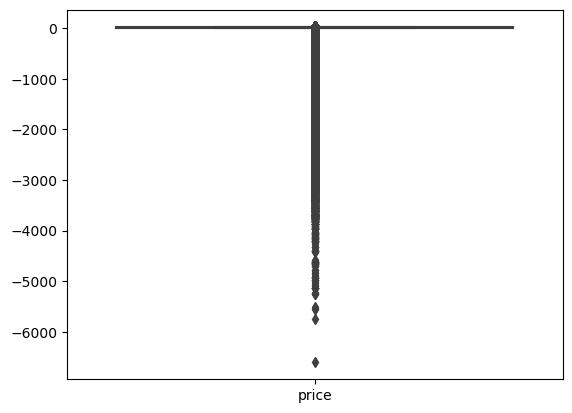

In [ ]:
sns.boxplot(df[['price']])


<Axes: >

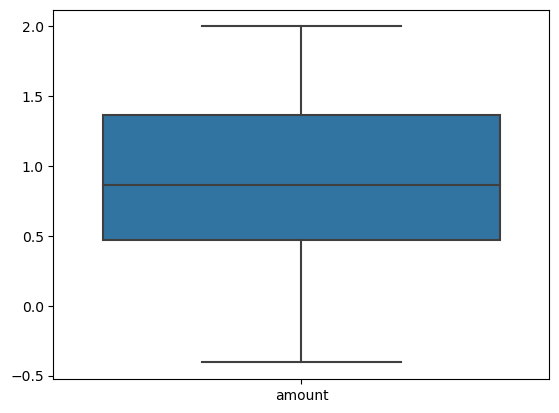

In [ ]:
sns.boxplot(df[['amount']])

In [ ]:
df.describe()

,price,amount
count,874585.000000,874540.000000
mean,-28.219977,0.924094
std,257.970818,0.550098
min,-6603.012000,-0.405939
25%,7.220000,0.473647
50%,9.880000,0.868430
75%,14.000000,1.364749
max,31.200000,1.999999


In [ ]:
threshold = 3

In [ ]:
for col in columns:

    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    df = df[z_scores < threshold].copy()

In [ ]:
df.describe()

,price,amount
count,855736.000000,855736.000000
mean,6.732687,0.924203
std,50.870146,0.549953
min,-802.098000,-0.405939
25%,7.410000,0.473873
50%,10.000000,0.868640
75%,14.110000,1.364523
max,31.200000,1.999999


<Axes: >

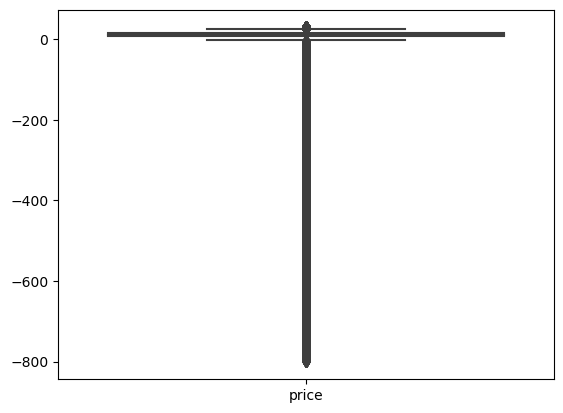

In [ ]:
sns.boxplot(df[['price']])

<Axes: >

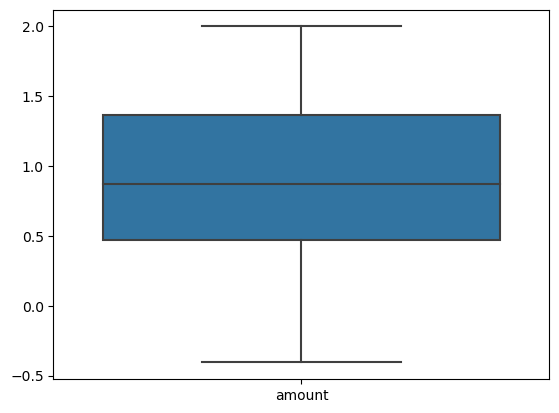

In [ ]:
sns.boxplot(df[['amount']])

In [ ]:
print('Количество строк в датафрейме после обработки данных:' ,len(df))

Количество строк в датафрейме после обработки данных: 855736


In [ ]:
df[['price', 'amount']]

,price,amount
0,3.90,0.550319
1,3.90,1.983822
2,3.90,1.765940
3,3.90,0.743802
4,3.90,0.550320
...,...,...
874891,9.28,1.273620
874893,9.28,0.430340
874894,9.28,1.454619
874895,9.28,0.933200


<Axes: xlabel='datetime', ylabel='Density'>

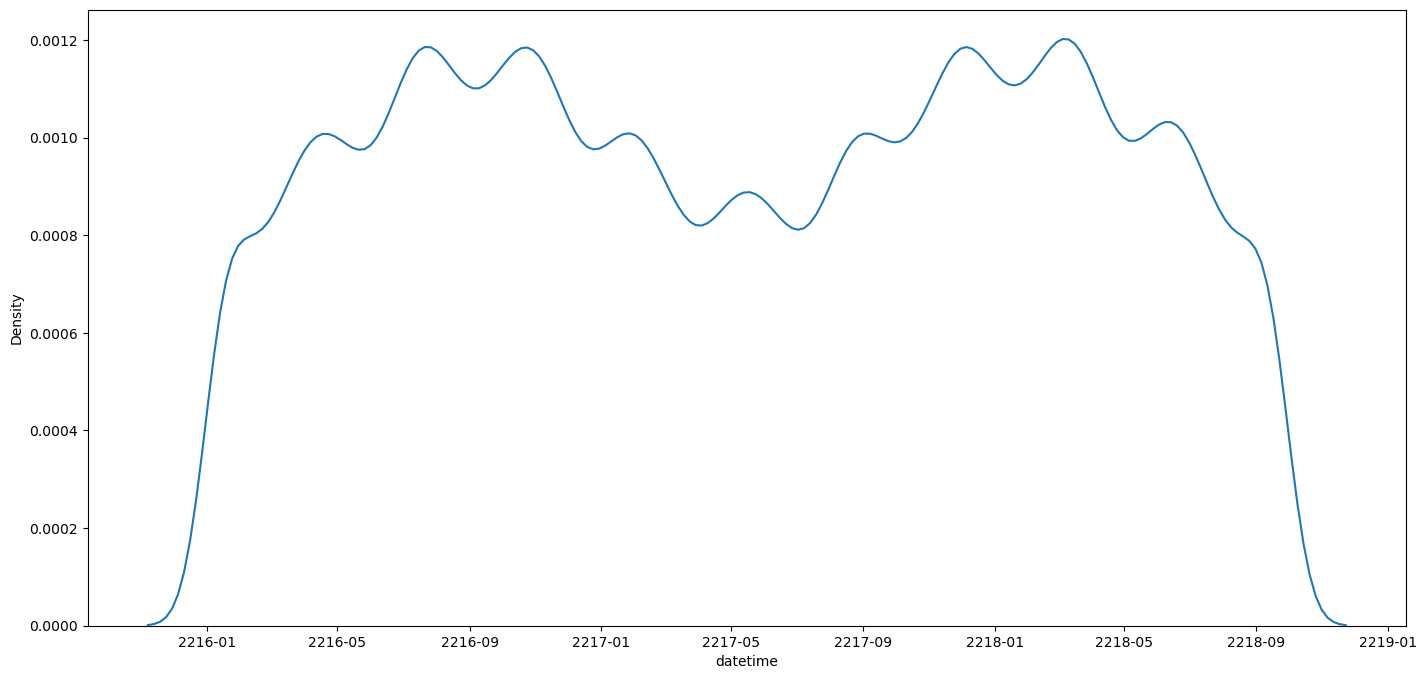

In [ ]:
plt.figure(figsize=(17,8))
sns.kdeplot(df['datetime'])


In [ ]:
df[df['datetime']>'2218-09-27 14:50:00']

,product,price,amount,place,datetime
54321,Целебные травы,13.63,1.581299,Анор Лондо,2218-09-27 16:38:00
54322,Целебные травы,13.63,0.974788,Анор Лондо,2218-09-27 16:53:00
54323,Целебные травы,13.63,1.905893,Анор Лондо,2218-09-27 17:28:00
54324,Целебные травы,13.63,0.113811,Анор Лондо,2218-09-27 18:15:00
54325,Целебные травы,13.63,1.507757,Анор Лондо,2218-09-27 18:26:00
...,...,...,...,...,...
874891,Эстус,9.28,1.273620,Фалькония,2218-09-27 22:05:00
874893,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00
874894,Эстус,9.28,1.454619,Фалькония,2218-09-27 22:37:00
874895,Эстус,9.28,0.933200,Фалькония,2218-09-27 23:02:00


In [ ]:
result = df.groupby('place')[['datetime']].count() / len(df)
result


,datetime
place,
Анор Лондо,0.195025
Врата Балдура,0.161587
Кеджистан,0.210290
Нокрон,0.213000
Фалькония,0.220097


In [ ]:
result = df.groupby('place')[['amount']].sum()
result


,amount
place,
Анор Лондо,154249.853051
Врата Балдура,127154.375965
Кеджистан,166350.978894
Нокрон,168792.194031
Фалькония,174326.270409


In [ ]:
result = df[df['datetime']>'2218-09-27 14:50:00'].groupby('place')[['datetime']].count() / len(df[df['datetime']>'2218-09-27 14:50:00'])
result


,datetime
place,
Анор Лондо,0.210031
Врата Балдура,0.169279
Кеджистан,0.235110
Нокрон,0.194357
Фалькония,0.191223


In [ ]:
result = df[df['datetime']>'2218-09-27 14:50:00'].groupby('place')[['amount']].sum() / len(df[df['datetime']>'2218-09-27 14:50:00'])
result


,amount
place,
Анор Лондо,0.200026
Врата Балдура,0.162950
Кеджистан,0.216548
Нокрон,0.195274
Фалькония,0.180447


Text(0.5, 1.0, 'График цен по датам')

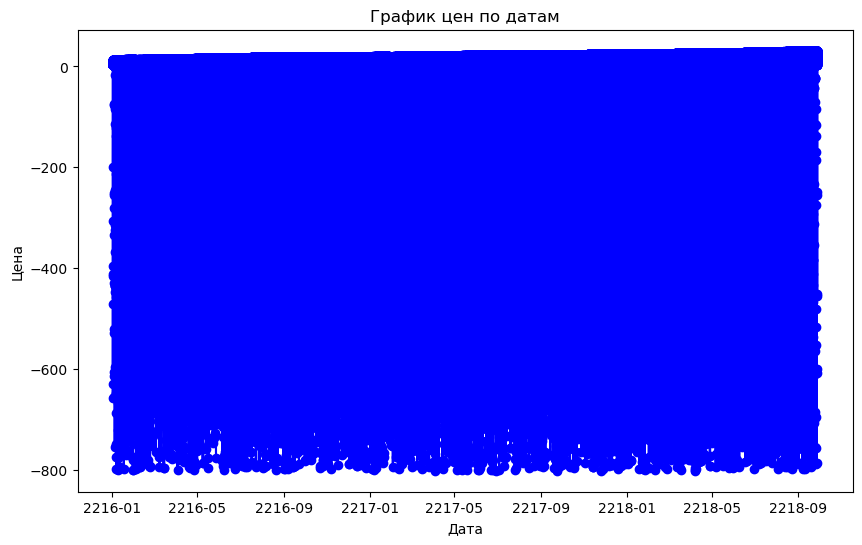

In [ ]:
# Создайте график
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['price'], marker='o', linestyle='-', color='b')
# Настройте оси и заголовок
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('График цен по датам')

In [ ]:
df['amount']

0         0.550319
1         1.983822
2         1.765940
3         0.743802
4         0.550320
            ...   
874891    1.273620
874893    0.430340
874894    1.454619
874895    0.933200
874897    0.772272
Name: amount, Length: 855736, dtype: float64

In [ ]:
df_sebe = pd.read_parquet("df_cost.parquet")

In [ ]:
df_sebe

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


In [ ]:
df

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
...,...,...,...,...,...
874891,Эстус,9.28,1.273620,Фалькония,2218-09-27 22:05:00
874893,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00
874894,Эстус,9.28,1.454619,Фалькония,2218-09-27 22:37:00
874895,Эстус,9.28,0.933200,Фалькония,2218-09-27 23:02:00


<Axes: >

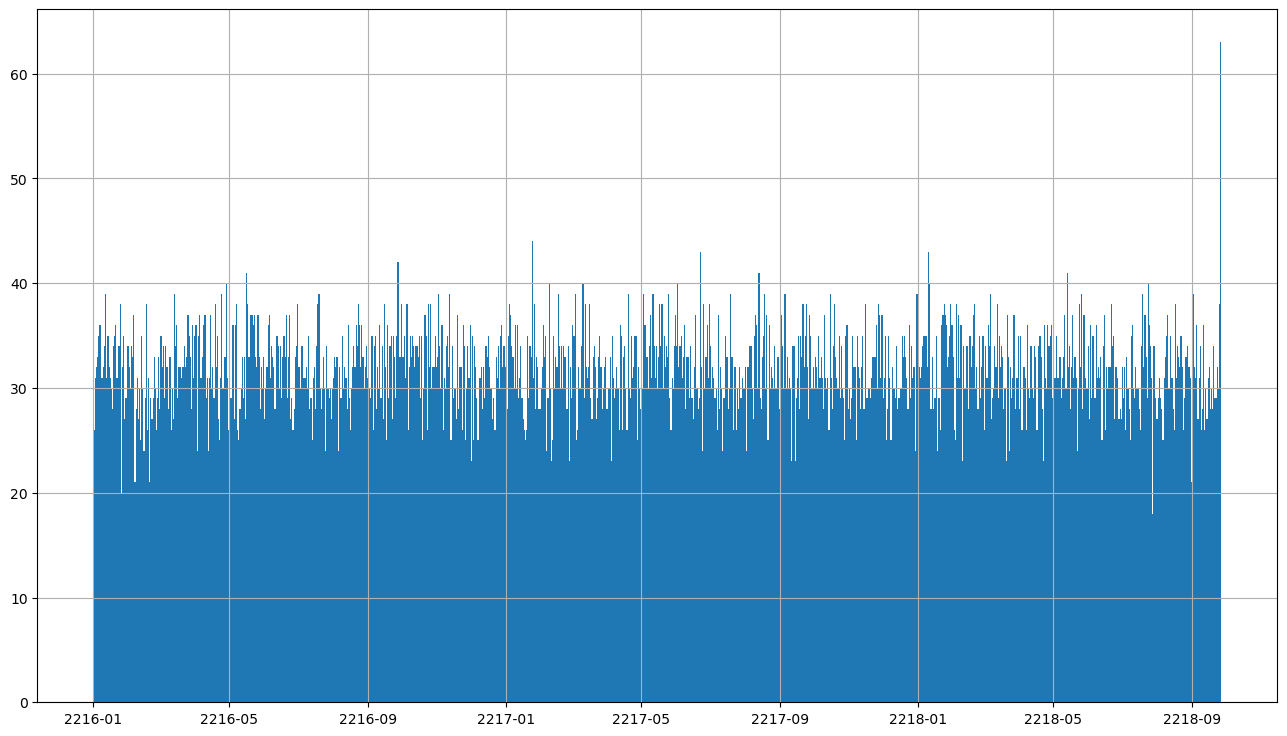

In [ ]:
df2['date'].hist(bins = 999, figsize=(16,9))

<Axes: >

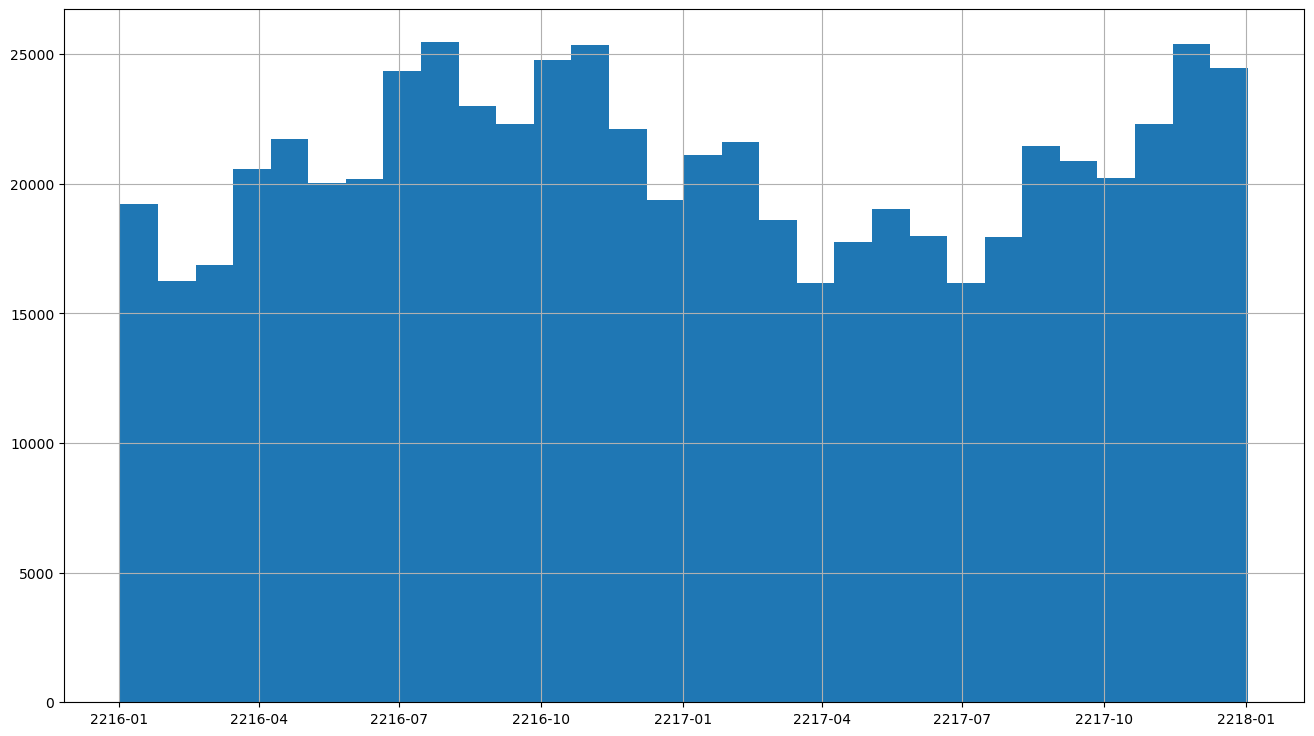

In [ ]:
df[df['datetime']<'2218-01-02 05:33:00']['datetime'].hist(bins = 30, figsize=(16,9))

In [ ]:
df.drop_duplicates()

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
...,...,...,...,...,...
874891,Эстус,9.28,1.273620,Фалькония,2218-09-27 22:05:00
874893,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00
874894,Эстус,9.28,1.454619,Фалькония,2218-09-27 22:37:00
874895,Эстус,9.28,0.933200,Фалькония,2218-09-27 23:02:00


In [ ]:
df[df['amount']<=0]

,product,price,amount,place,datetime
422,Целебные травы,3.90,-0.165123,Анор Лондо,2216-01-09 14:24:00
455,Целебные травы,3.90,-0.090032,Анор Лондо,2216-01-10 03:12:00
456,Целебные травы,3.90,-0.109079,Анор Лондо,2216-01-10 03:15:00
658,Целебные травы,3.90,-0.106470,Анор Лондо,2216-01-14 02:51:00
659,Целебные травы,3.90,-0.154130,Анор Лондо,2216-01-14 03:28:00
...,...,...,...,...,...
870928,Эстус,9.69,-0.028707,Фалькония,2218-07-24 16:17:00
871323,Эстус,9.69,-0.044234,Фалькония,2218-07-30 18:42:00
872602,Эстус,9.56,-0.178665,Фалькония,2218-08-22 10:26:00
873463,Эстус,9.29,-0.033790,Фалькония,2218-09-06 09:15:00


In [ ]:
df[df['price']<=0]

,product,price,amount,place,datetime
116,Целебные травы,-74.644,1.798352,Анор Лондо,2216-01-04 04:42:00
123,Целебные травы,-429.884,0.231318,Анор Лондо,2216-01-04 08:41:00
132,Целебные травы,-314.112,1.927864,Анор Лондо,2216-01-04 12:13:00
171,Целебные травы,-447.482,0.858790,Анор Лондо,2216-01-05 09:48:00
186,Целебные травы,-596.946,1.361650,Анор Лондо,2216-01-05 18:22:00
...,...,...,...,...,...
872201,Эстус,-464.964,1.896314,Фалькония,2218-08-15 14:33:00
872489,Эстус,-736.872,1.742608,Фалькония,2218-08-20 20:00:00
872622,Эстус,-713.130,0.569633,Фалькония,2218-08-22 19:14:00
872966,Эстус,-672.128,1.302434,Фалькония,2218-08-28 23:35:00


In [ ]:
len(df[df['datetime']<'2216-01-02 05:33:00']['datetime'])

159

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']).dt.date

In [ ]:
df = df.groupby(['datetime', 'place']).agg({'price': 'mean', 'amount': 'sum'}).reset_index().copy()
df

,datetime,place,price,amount
0,2216-01-02,Анор Лондо,5.840884,165.513422
1,2216-01-02,Врата Балдура,3.729333,107.167500
2,2216-01-02,Кеджистан,-2.995092,182.260527
3,2216-01-02,Нокрон,3.643058,152.344243
4,2216-01-02,Фалькония,1.786500,137.154812
...,...,...,...,...
4995,2218-09-27,Анор Лондо,12.700589,157.582512
4996,2218-09-27,Врата Балдура,20.577500,102.129690
4997,2218-09-27,Кеджистан,22.198678,163.338088
4998,2218-09-27,Нокрон,9.286192,161.655274


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.dtypes

datetime    datetime64[ns]
place               object
price              float64
amount             float64
dtype: object

<Axes: >

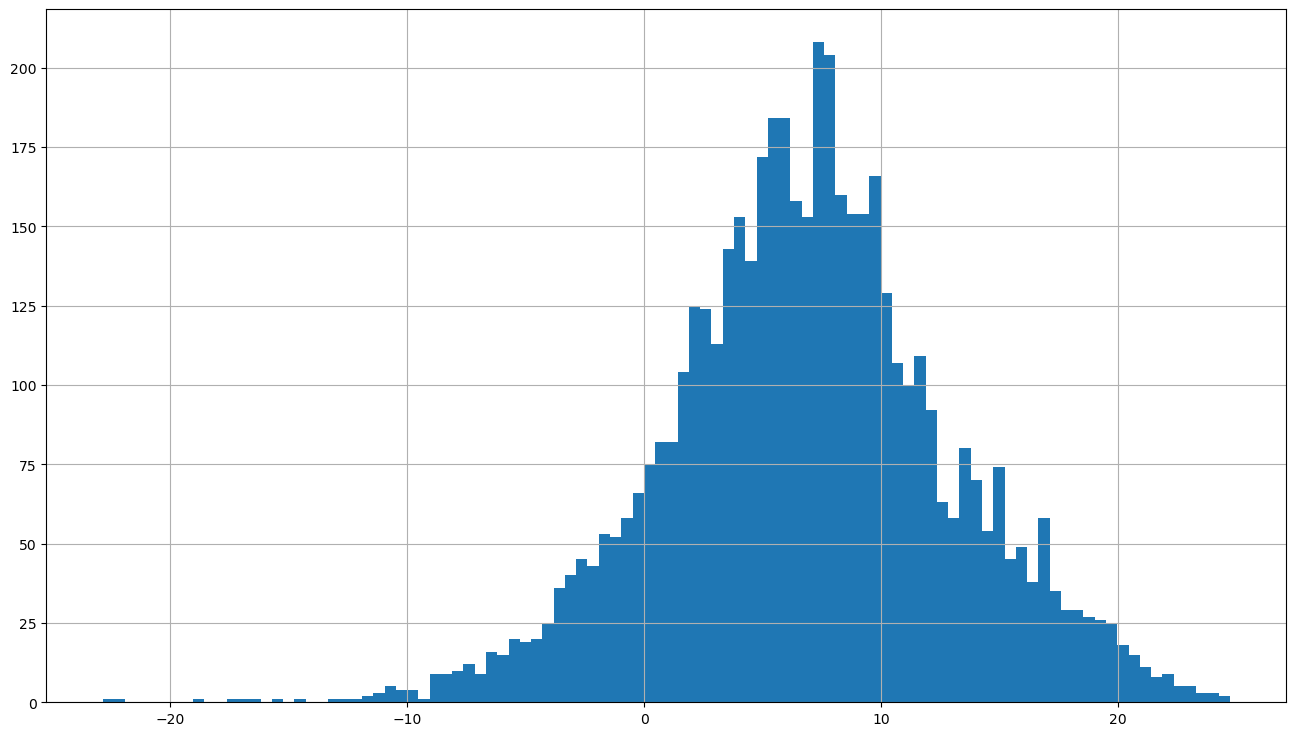

In [ ]:
df['price'].hist(bins = 100, figsize=(16,9))

Text(0.5, 1.0, 'График цен по датам')

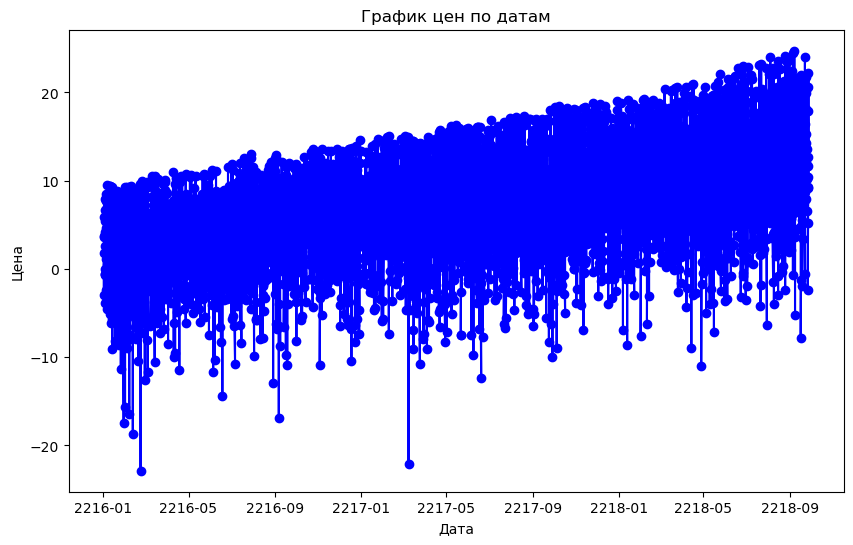

In [ ]:
# Создайте график
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['price'], marker='o', linestyle='-', color='b')
# Настройте оси и заголовок
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('График цен по датам')

<Axes: xlabel='datetime', ylabel='Density'>

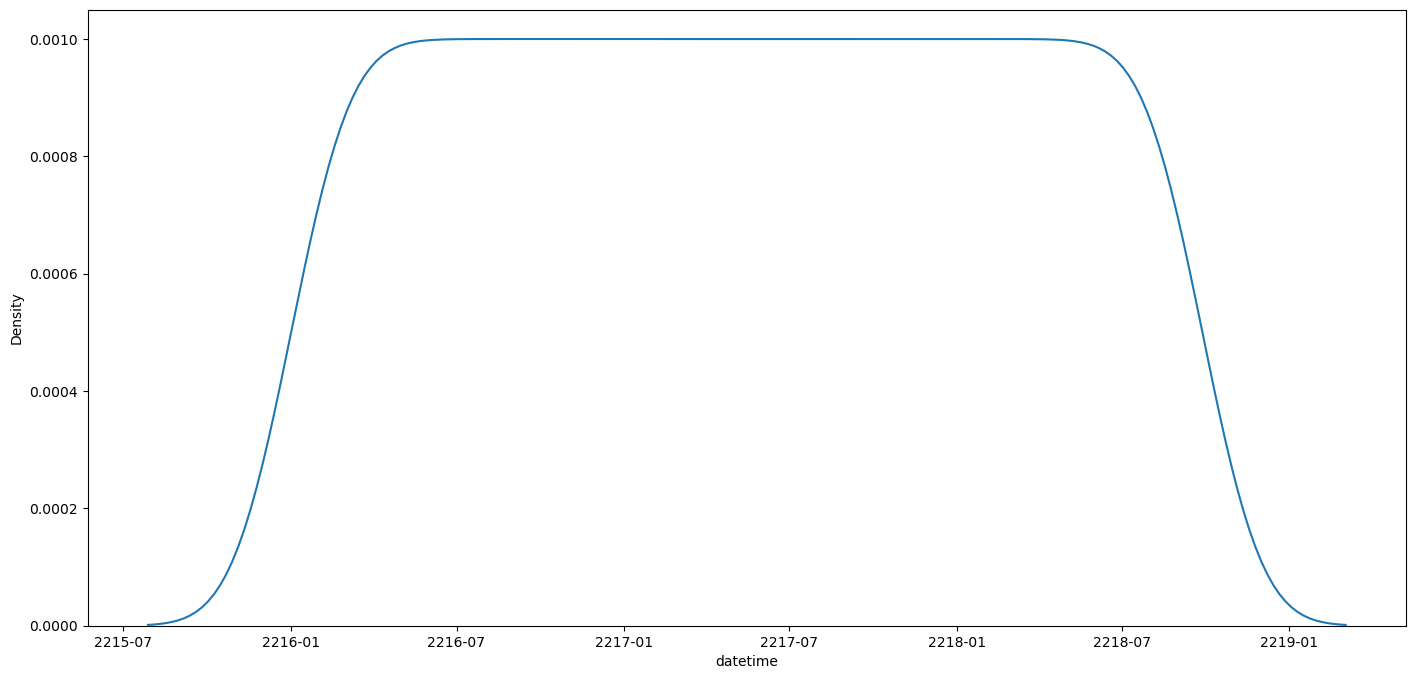

In [ ]:
plt.figure(figsize=(17,8))
sns.kdeplot(df['datetime'])
